# Music Recommendation System using KMeans & KNN

In [3]:
# import Libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [52]:
#load dataset
data=pd.read_csv("Dataset/songs_normalize.csv")
data.head()
list(data.columns.array)

['artist',
 'song',
 'duration_ms',
 'explicit',
 'year',
 'popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'genre']

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre', 'rock', ' latin', 'easy listening', 'Dance/Electronic',
       ' Folk/Acoustic', 'Folk/Acoustic', 'latin', 'R&B', ' jazz', 'pop',
       ' classical', 'country', ' country', ' rock', ' easy listening',
       ' hip hop', 'metal', 'set()', 'hip hop', ' metal', ' pop',
       'World/Traditional', ' blues', ' R&B', ' Dance/Electronic', 'cat',
       'cluster'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [5]:
data.shape

(2000, 18)

In [6]:
data.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [7]:
data.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [8]:
data.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


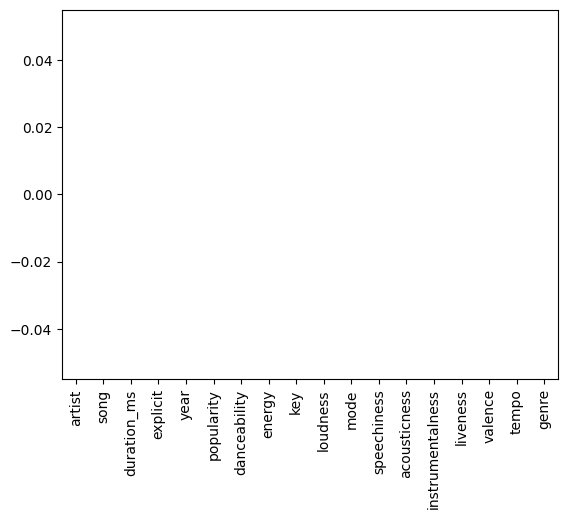

In [9]:
#plot null values count

data.isnull().sum().plot.bar()
plt.show()

In [10]:
data.select_dtypes(np.number)

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,178426,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,200593,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,171029,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


In [11]:
#convert true/false value to 0/1
data['explicit']=data['explicit'].astype(int)
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [12]:
#Correlation matrix
numeric_features = [
    'duration_ms', 'explicit', 'year', 'popularity', 'danceability', 
    'energy', 'key', 'loudness', 'mode', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

numeric_data=data[numeric_features]

corr_matrix = numeric_data.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418
energy,-0.078763,-0.162462,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719
key,-0.002560,0.003320,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431
loudness,-0.079912,-0.089829,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709
mode,-0.003848,0.049576,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434
speechiness,0.066998,0.417343,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747


In [13]:
#visualizing trend in music against the years for independent features
from sklearn.preprocessing import StandardScaler
import plotly.express as px


  0%|          | 0/13 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:06<00:00,  2.10it/s]


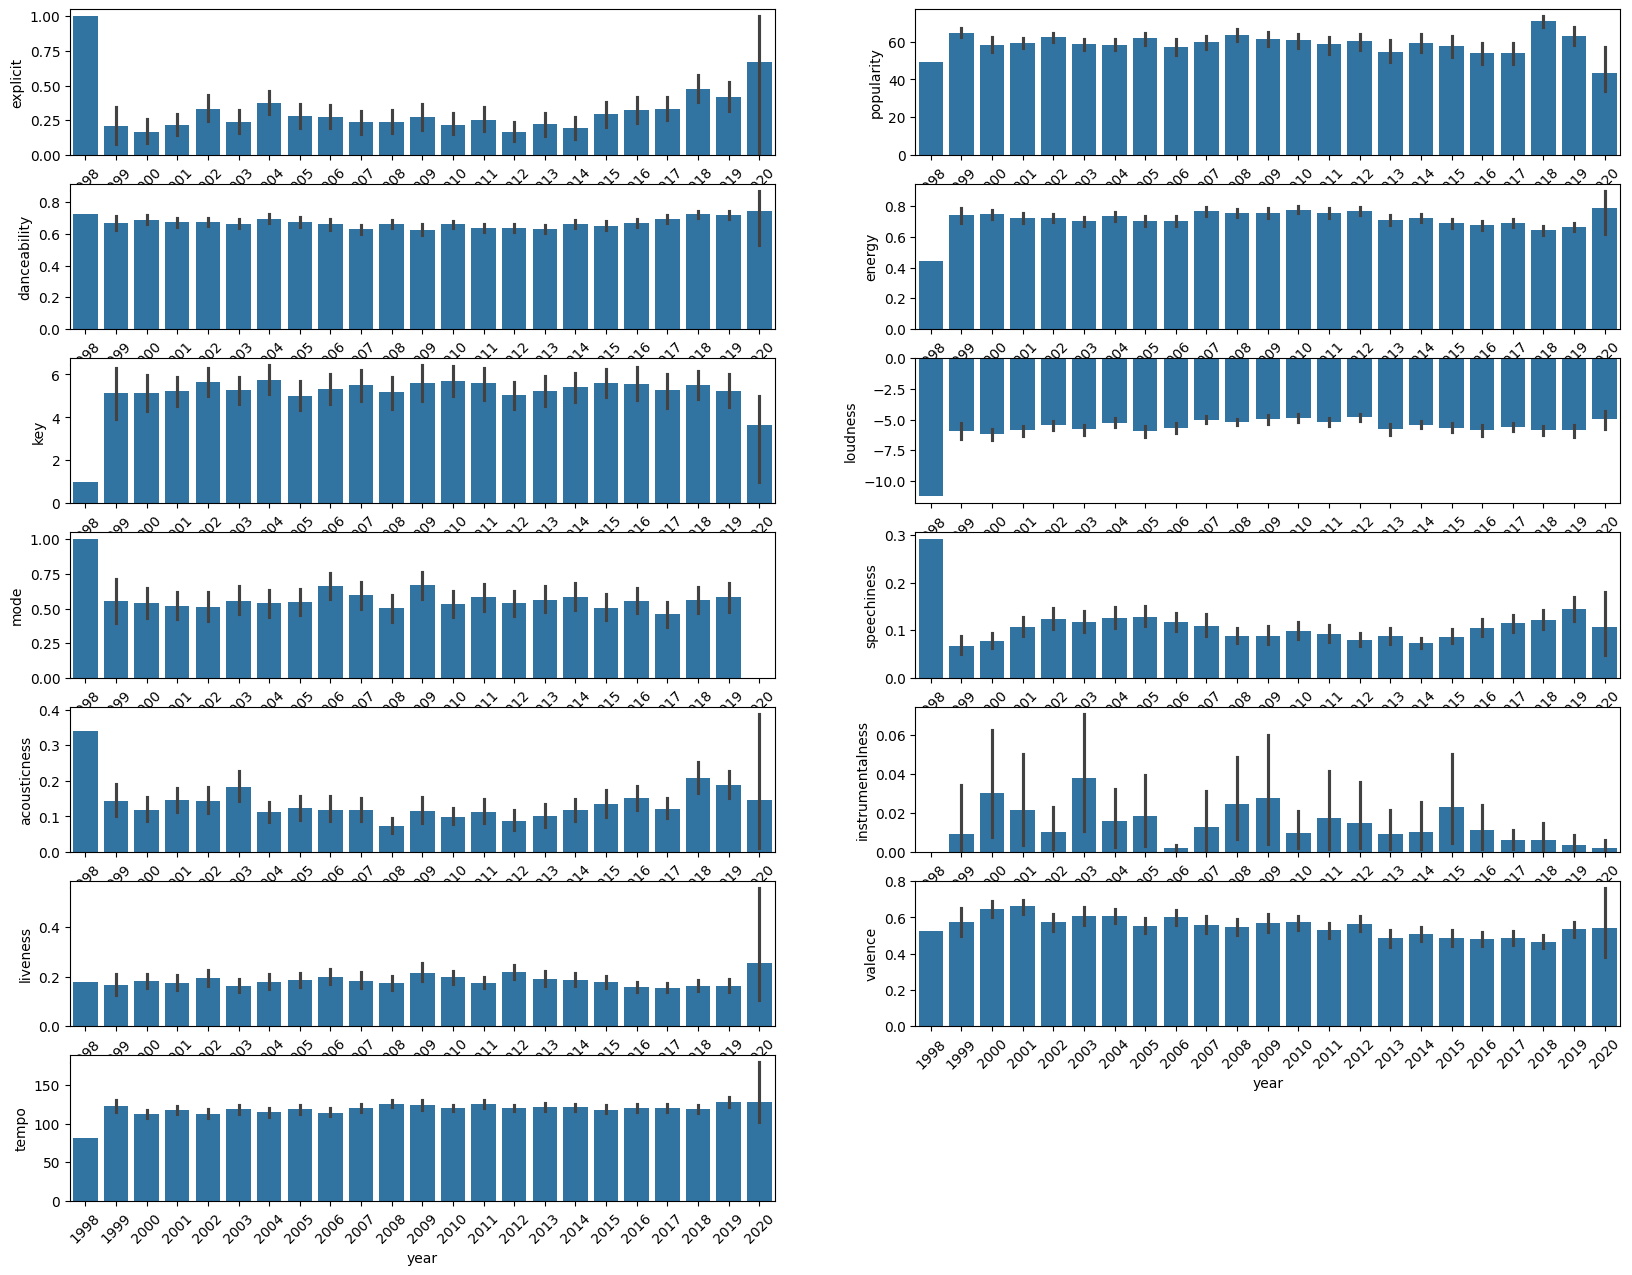

In [14]:
visual_data = data.drop(columns=['song', 'artist', 'year', 'genre'])

plt.figure(figsize=(20, 20))
for i in tqdm(np.arange(1, len(visual_data.columns))):
    plt.subplot(9, 2, i)
    sb.barplot(x=data.year,y=visual_data[visual_data.columns[i]])
    plt.xticks(rotation=45);
plt.show()

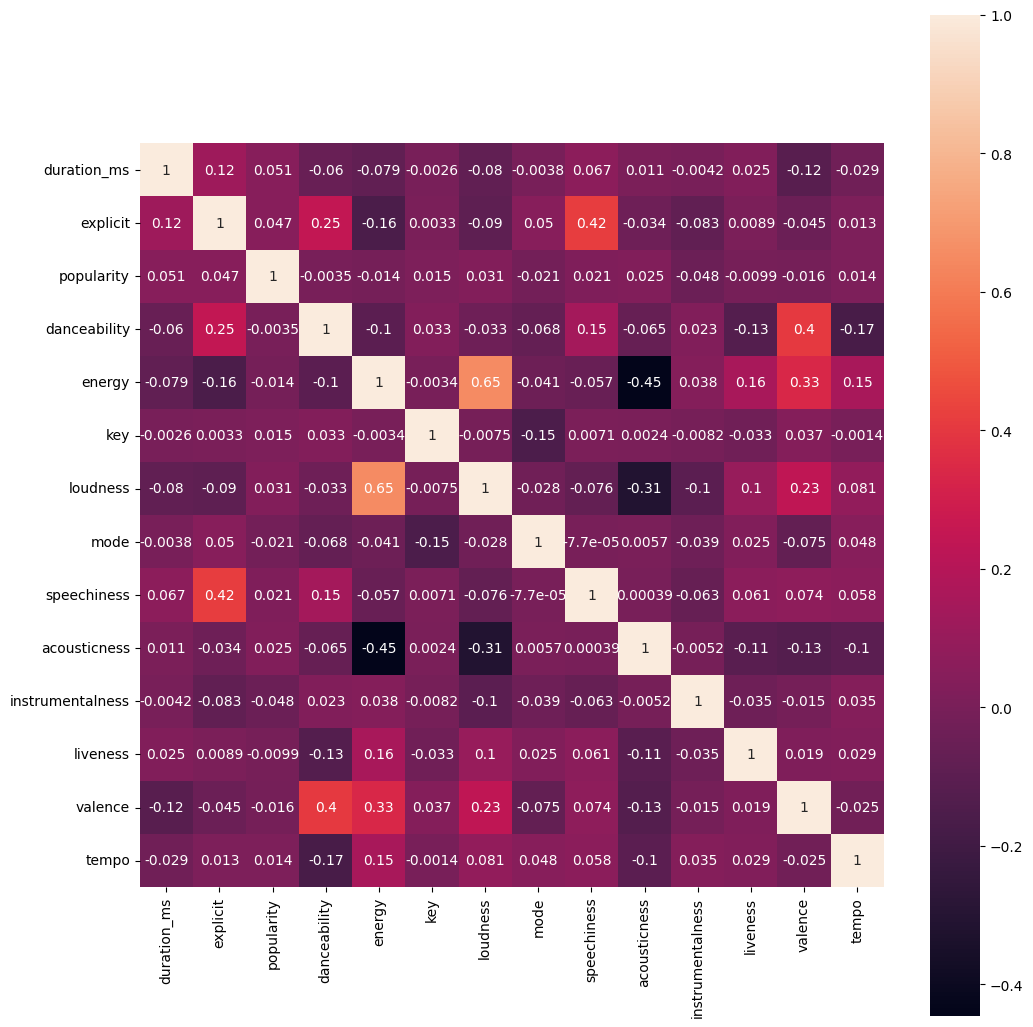

In [15]:
#HeatMap
plt.subplots(figsize=(12,13))
sb.heatmap(visual_data.corr(),annot=True,square=True)
plt.show()

In [16]:
from sklearn.preprocessing import OneHotEncoder
unique_genres = set()
for genre_list in data["genre"]:
    genres = genre_list.split(",")
    for genre in genres:
        unique_genres.add(genre)

encoder = OneHotEncoder()
encoder.fit([[genre] for genre in unique_genres])

encoded_genres = []
for genres in data["genre"]:
    genres = genres.split(",")
    one_hot = [0 if genre not in genres else 1 for genre in unique_genres]
    encoded_genres.append(one_hot)

In [17]:
#Normalizing the columns

import os
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [19]:
def normalize_column(col):
    max_d = data[col].max()
    min_d = data[col].min()
    data[col] = (data[col] - min_d)/(max_d - min_d)

In [20]:
#Before Normalisation
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [21]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = data.select_dtypes(include=num_types)
        
for col in num.columns:
    if col != 'year':
        normalize_column(col) 

<Axes: >

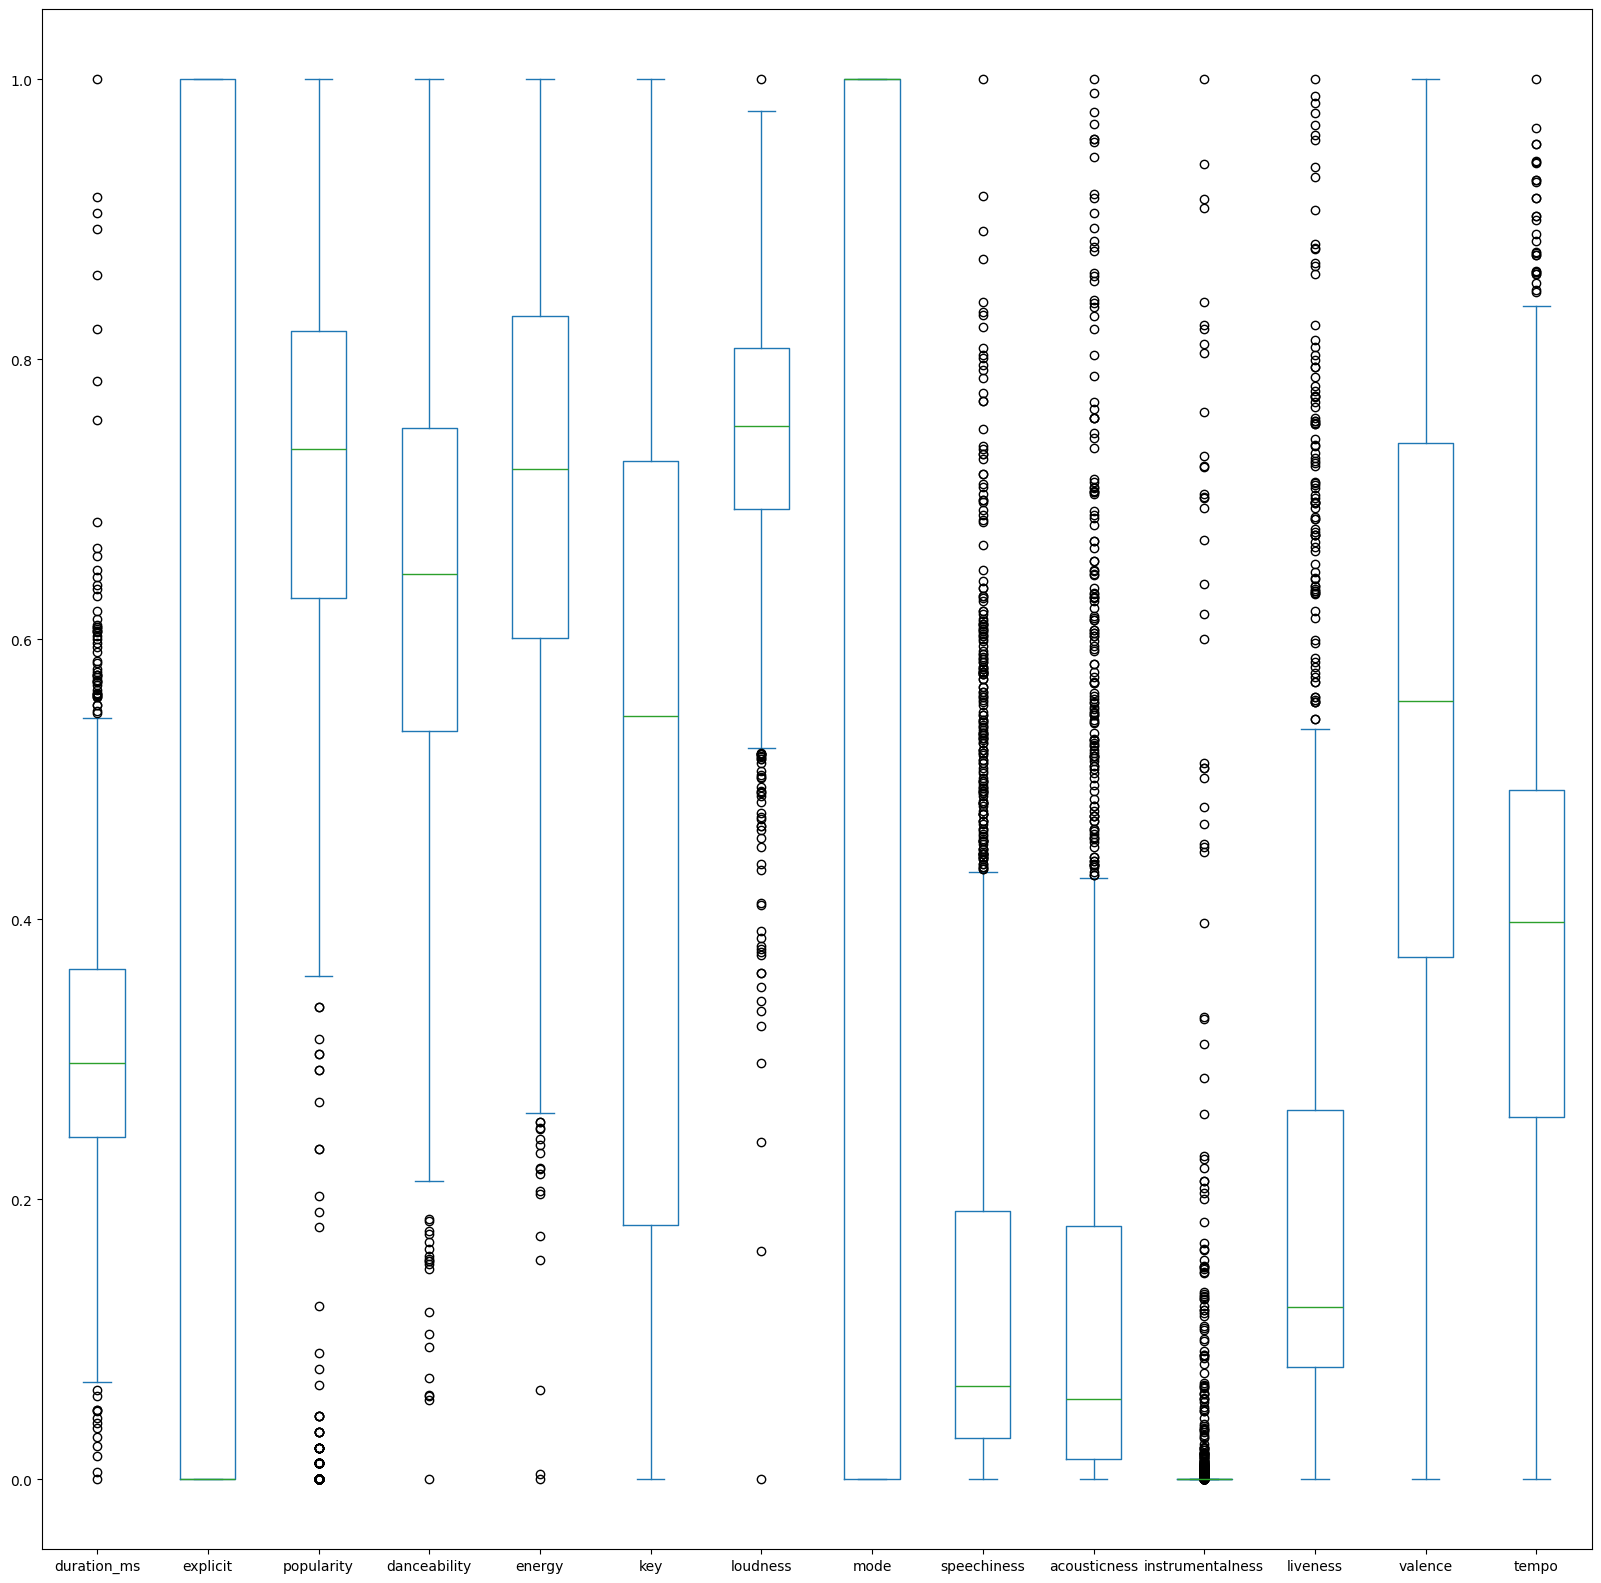

In [22]:
#Boxplot visualization to identify outliers
data.select_dtypes(np.number).drop(columns = ['year']).plot(kind='box' ,figsize=(20, 20) ,fontsize=10)

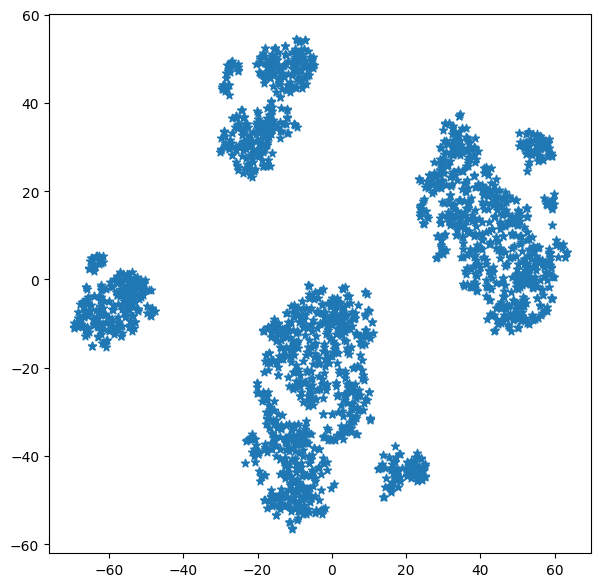

In [24]:
#Scatterplot visualization to see patterns of interest
model = TSNE(n_components = 2, random_state = 0)
music_data_modified = data.select_dtypes(np.number).drop(columns=['year'])
tsne_data = model.fit_transform(music_data_modified)
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1],  marker= '*')
plt.show()


In [26]:
encoded_genres_df = pd.DataFrame(encoded_genres, columns=list(unique_genres))

# Concatenate the encoded genres DataFrame with the original dataset
data = pd.concat([data, encoded_genres_df], axis=1)

# View the dataset with the encoded genres
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,hip hop,metal,set(),hip hop,metal,pop,World/Traditional,blues,R&B,Dance/Electronic
0,Britney Spears,Oops!...I Did It Again,0.264478,0.0,2000,0.865169,0.735225,0.825230,0.090909,0.744639,...,0,0,0,0,0,0,0,0,0,0
1,blink-182,All The Small Things,0.145673,0.0,1999,0.887640,0.360520,0.891961,0.000000,0.770630,...,0,0,0,0,0,1,0,0,0,0
2,Faith Hill,Breathe,0.370598,0.0,1999,0.741573,0.472813,0.467217,0.636364,0.568584,...,0,0,0,0,0,0,0,0,0,0
3,Bon Jovi,It's My Life,0.300402,0.0,2000,0.876404,0.498818,0.908908,0.000000,0.812877,...,0,0,0,0,1,0,0,0,0,0
4,*NSYNC,Bye Bye Bye,0.235918,0.0,2000,0.730337,0.573286,0.924796,0.727273,0.776164,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
cat = km.fit_predict(num)
data['cat'] = cat
normalize_column('cat')

In [28]:
data.cat[:10]

0    0.111111
1    0.333333
2    0.222222
3    0.111111
4    0.777778
5    0.222222
6    0.000000
7    0.222222
8    0.666667
9    0.000000
Name: cat, dtype: float64

In [29]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = data.select_dtypes(np.number)
cluster_pipeline.fit(X)
data['cluster'] = cluster_pipeline.predict(X)

In [30]:
#Visualizing the Clusters with t-SNE
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = data['genre']
projection['cluster'] = data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.272s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 1.708829
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.134926
[t-SNE] KL divergence after 1000 iterations: 1.128336


In [31]:
#Spliting in testing and training

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = data.select_dtypes(np.number).drop(columns = ['cat','cluster','year']).copy()
y = data['cluster']

In [32]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1600, 39)
(1600,)
(200, 39)
(200,)
(200, 39)
(200,)


(None, None)

In [33]:
#using various values of K we shall train our model
#using multiple neighbours value to get accurate results
knn1= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=1)
knn5= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=5)
knn10= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=10)

In [34]:
#fitting each model with training and validation data
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

knn5.fit(X_valid, y_valid)
knn1.fit(X_valid, y_valid)
knn10.fit(X_valid, y_valid)

knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_valid)
y_pred_1 = knn1.predict(X_valid)
y_pred_10 = knn1.predict(X_valid)

In [35]:
#Check Accuracy Metrics
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_valid, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_valid, y_pred_1)*100)
print("Accuracy with k=10", accuracy_score(y_valid, y_pred_10)*100)

#as we can see that with 5 and 10 neighbours we have highest accuracy

Accuracy with k=5 94.0
Accuracy with k=1 93.5
Accuracy with k=10 93.5


In [36]:
#Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid, y_pred_1))
print(confusion_matrix(y_valid, y_pred_5))
print(confusion_matrix(y_valid, y_pred_10))

[[13  1  5  0  0  0  0]
 [ 1 30  0  0  1  0  0]
 [ 3  0 66  0  1  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  1  0 64  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  1]]
[[13  1  5  0  0  0  0]
 [ 0 30  0  0  2  0  0]
 [ 1  0 68  0  1  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  1  0  0 64  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  0  0  0  0]]
[[13  1  5  0  0  0  0]
 [ 1 30  0  0  1  0  0]
 [ 3  0 66  0  1  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  1  0 64  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  1]]


In [37]:
print(classification_report(y_valid, y_pred_1))
print(classification_report(y_valid, y_pred_5))
print(classification_report(y_valid, y_pred_10))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        19
           1       0.97      0.94      0.95        32
           2       0.92      0.94      0.93        70
           3       1.00      1.00      1.00         8
           4       0.97      0.98      0.98        65
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         1

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.93      0.94      0.93       200

              precision    recall  f1-score   support

           0       0.93      0.68      0.79        19
           1       0.94      0.94      0.94        32
           2       0.92      0.97      0.94        70
           3       1.00      1.00      1.00         8
           4       0.96      0.98      0.97        65
           5       1.00      1.00      1.00         5
           6       0.00 

In [38]:
#Visualizing the prediction
tsne_model = TSNE(n_components = 2, random_state = 0)
tsne_data_X_valid = tsne_model.fit_transform(X_test)

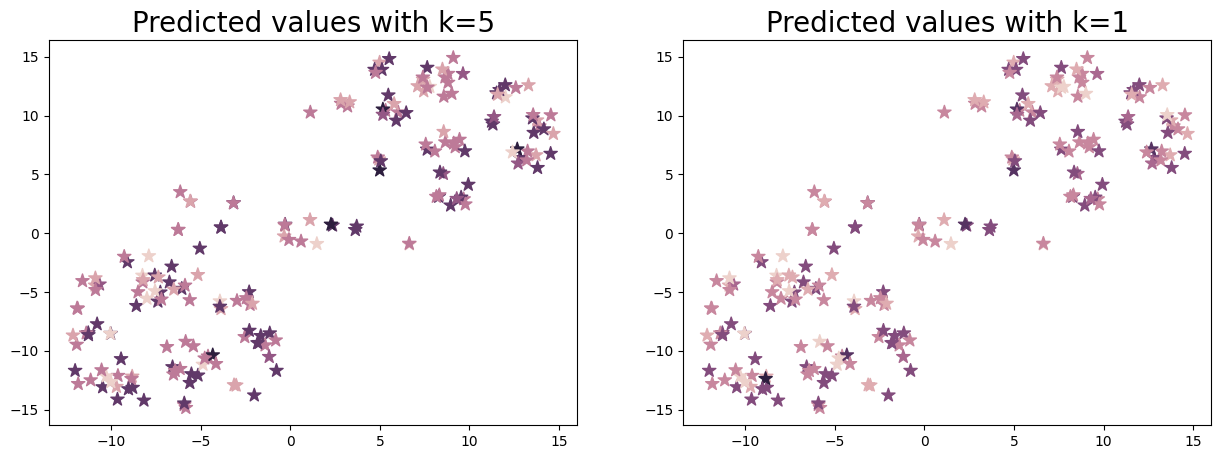

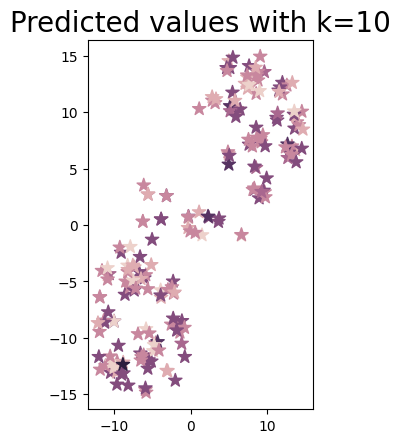

In [39]:
cmap = sb.cubehelix_palette(as_cmap=True)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_5, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=5", fontsize=20)
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_1, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=1", fontsize=20)
plt.show()
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_10, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=10", fontsize=20)
plt.show()

# Creating Recommendation System

In [44]:
import numpy as np
from fuzzywuzzy import process
X_test.columns


Index(['duration_ms', 'explicit', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'rock', ' latin',
       'easy listening', 'Dance/Electronic', ' Folk/Acoustic', 'Folk/Acoustic',
       'latin', 'R&B', ' jazz', 'pop', ' classical', 'country', ' country',
       ' rock', ' easy listening', ' hip hop', 'metal', 'set()', 'hip hop',
       ' metal', ' pop', 'World/Traditional', ' blues', ' R&B',
       ' Dance/Electronic'],
      dtype='object')

In [40]:
#inner join is the type of merging method

recommendation_set = data.merge(X_test, how = 'inner' ,indicator=False)
recommendation_set

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,set(),hip hop,metal,pop,World/Traditional,blues,R&B,Dance/Electronic,cat,cluster
0,Sisqo,Thong Song,0.379185,1.0,1999,0.775281,0.682033,0.882428,0.181818,0.669780,...,0,1,0,1,0,0,1,0,0.222222,4
1,Eminem,The Real Slim Shady,0.461274,1.0,2000,0.966292,0.969267,0.641987,0.454545,0.803933,...,0,1,0,0,0,0,0,0,0.000000,4
2,Modjo,Lady - Hear Me Tonight,0.523118,0.0,2001,0.865169,0.698582,0.797691,0.545455,0.735596,...,0,0,0,0,0,0,0,0,0.000000,5
3,Melanie C,Never Be The Same Again,0.488218,0.0,1999,0.685393,0.661939,0.667408,0.272727,0.759018,...,0,0,0,0,0,0,0,1,0.000000,1
4,Alice Deejay,Better Off Alone,0.274509,0.0,2000,0.820225,0.640662,0.873954,0.727273,0.709803,...,0,0,0,0,0,0,0,0,0.111111,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Calvin Harris,Giant (with Rag'n'Bone Man),0.313041,0.0,2019,0.820225,0.801418,0.881368,0.090909,0.800623,...,0,1,0,1,0,0,0,1,0.888889,1
209,Ed Sheeran,Take Me Back to London (feat. Stormzy),0.206746,1.0,2019,0.741573,0.893617,0.748967,0.727273,0.741229,...,0,0,0,0,0,0,0,0,0.333333,2
210,Megan Thee Stallion,Hot Girl Summer (feat. Nicki Minaj & Ty Dolla ...,0.232865,1.0,2019,0.775281,0.878251,0.804046,0.000000,0.787924,...,0,1,0,1,0,0,1,0,0.777778,4
211,NSG,Options,0.342402,1.0,2020,0.640449,0.835697,0.599619,0.090909,0.782192,...,0,0,0,0,1,0,0,0,0.888889,7


In [65]:
len(recommendation_set)

214

In [41]:
def recommender(song_name,model):
    idx=process.extractOne(song_name, recommendation_set['song'])[2]
    print('Song Selected:-',recommendation_set['song'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    requiredSongs = recommendation_set.select_dtypes(np.number).drop(columns = ['cat','cluster','year']).copy()
    distances, indices = model.kneighbors(requiredSongs.iloc[idx].values.reshape(1,-1))
    for i in indices:
        print(data['song'][i] + "      " + data['artist'][i])

In [42]:
def get_song_info(row_number):
    song_info = recommendation_set.loc[row_number, ["song", "artist"]]
    return song_info

song_info = get_song_info(2)
print("Song name: ", song_info["song"])
print("Artist name: ", song_info["artist"])

Song name:  Lady - Hear Me Tonight
Artist name:  Modjo


In [46]:
song_name=song_info["song"]
# X_test['song'] = recommendation_set['song']

recommender(song_name, knn10)


Song Selected:- Lady - Hear Me Tonight Index:  2
Searching for recommendations.....
84                            Pure Shores      All Saints
941                       Fight For This Love      Cheryl
1332                          White Noise      Disclosure
1403                               Fancy      Iggy Azalea
1169    Bounce (feat. Kelis) - Radio Edit      Calvin ...
1152                               Buzzin Remix      Mann
308                 All The Things She Said      t.A.T.u.
770                         Misery Business      Paramore
241                          Freak Like Me      Sugababes
463                     Wanna Get To Know You      G-Unit
dtype: object
